<h1><b><center>Projet 5_Segmentation</center></b></h1>
<h1><b><center>Segmentez les clients d'un site e-commerce</center></b></h1>

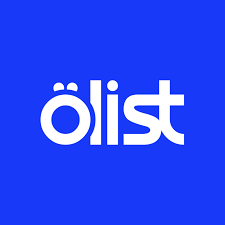

Dans ce notebook, nous effectuerons 3 types de segmentation des clients:
* Segmentation par l'avis des clients
* Segmentation par sa localisation
* Segmentation par RFM (Récence, Fréquence et Montant).

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

os.chdir('Desktop/OC/Projet_5')

In [2]:
# Importation du dataframe 'positive_reviews'

positive_reviews = pd.read_csv('positive_reviews.csv')
positive_reviews = positive_reviews.drop("Unnamed: 0", axis = 1)
positive_reviews

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
75912  af2dc0519de6e0720ef0c74292fb4114  d699c734a0b1c8111f2272a3f36d398c   
75913  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
75914  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
75915  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
75916  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   

       review_score  review_bool review_comment_title  \
0                 4            1                  NaN   
1                 5            1                  NaN   
2                 5            1                  NaN   
3                 5            1                  NaN   
4                 5            1                  NaN   
...             ...          ...                  ...   
75912             5            1                  NaN   
75913             5            1                  NaN   
75914             5            1                  NaN   
75915             5            1                  NaN   
75916             4            1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                      -  2018-01-18 00:00:00   
1                                                      -  2018-03-10 00:00:00   
2                                                      -  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
75912                                                  -  2018-04-27 00:00:00   
75913                                                  -  2018-07-07 00:00:00   
75914                                                  -  2017-12-09 00:00:00   
75915  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
75916                                                  -  2018-07-01 00:00:00   

      review_answer_timestamp  order_item_id  \
0         2018-01-18 21:46:59            1.0   
1         2018-03-11 03:05:13            1.0   
2         2018-02-18 14:36:24            1.0   
3         2017-04-21 22:02:06            1.0   
4         2018-03-02 10:26:53            1.0   
...                       ...            ...   
75912     2018-04-30 01:18:57            1.0   
75913     2018-07-14 17:18:30            1.0   
75914     2017-12-11 20:06:42            1.0   
75915     2018-03-23 09:10:43            1.0   
75916     2018-07-02 12:59:13            1.0   

                             product_id                         seller_id  \
0      fd25ab760bfbba13c198fa3b4f1a0cd3  6d803cb79cc31c41c4c789a75933b3c7   
1      be0dbdc3d67d55727a65d4cd696ca73c  8e6d7754bc7e0f22c96d255ebda59eba   
2      d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
3      52c80cedd4e90108bf4fa6a206ef6b03  a1043bafd471dff536d0c462352beb48   
4      3880d25d502b15b1de6fddc42ad1d67a  989becdce12ebc39863c2bceab6f3ca1   
...                                 ...                               ...   
75912  b9ca577f48894c59a9677f895f9a44bc  527801b552d0077ffd170872eb49683b   
75913  4fb209073dc2ab6a6d3c259a7c285501  5343d0649eca2a983820bfe93fc4d17e   
75914  3a33c980b62eb1ef3b8ae61b6fc6fe55  46dc3b2cc0980fb8ec44634e21d2718e   
75915  8ba0118a487ec8671aed57e5ef846574  17ca9b9e9b9ef8fdb529001b49ebb50f   
75916  73a7fbf8c1048131

In [3]:
# Importation du dataframe 'positive_reviews_location'

positive_reviews_location = pd.read_csv('positive_reviews_location.csv')
positive_reviews_location = positive_reviews_location.drop("Unnamed: 0", axis = 1)
positive_reviews_location

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
73753  af2dc0519de6e0720ef0c74292fb4114  d699c734a0b1c8111f2272a3f36d398c   
73754  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
73755  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
73756  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
73757  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   

       review_score  review_bool review_comment_title  \
0                 4            1                  NaN   
1                 5            1                  NaN   
2                 5            1                  NaN   
3                 5            1                  NaN   
4                 5            1                  NaN   
...             ...          ...                  ...   
73753             5            1                  NaN   
73754             5            1                  NaN   
73755             5            1                  NaN   
73756             5            1                  NaN   
73757             4            1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                      -  2018-01-18 00:00:00   
1                                                      -  2018-03-10 00:00:00   
2                                                      -  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
73753                                                  -  2018-04-27 00:00:00   
73754                                                  -  2018-07-07 00:00:00   
73755                                                  -  2017-12-09 00:00:00   
73756  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
73757                                                  -  2018-07-01 00:00:00   

      review_answer_timestamp  order_item_id  \
0         2018-01-18 21:46:59            1.0   
1         2018-03-11 03:05:13            1.0   
2         2018-02-18 14:36:24            1.0   
3         2017-04-21 22:02:06            1.0   
4         2018-03-02 10:26:53            1.0   
...                       ...            ...   
73753     2018-04-30 01:18:57            1.0   
73754     2018-07-14 17:18:30            1.0   
73755     2017-12-11 20:06:42            1.0   
73756     2018-03-23 09:10:43            1.0   
73757     2018-07-02 12:59:13            1.0   

                             product_id                         seller_id  \
0      fd25ab760bfbba13c198fa3b4f1a0cd3  6d803cb79cc31c41c4c789a75933b3c7   
1      be0dbdc3d67d55727a65d4cd696ca73c  8e6d7754bc7e0f22c96d255ebda59eba   
2      d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
3      52c80cedd4e90108bf4fa6a206ef6b03  a1043bafd471dff536d0c462352beb48   
4      3880d25d502b15b1de6fddc42ad1d67a  989becdce12ebc39863c2bceab6f3ca1   
...                                 ...                               ...   
73753  b9ca577f48894c59a9677f895f9a44bc  527801b552d0077ffd170872eb49683b   
73754  4fb209073dc2ab6a6d3c259a7c285501  5343d0649eca2a983820bfe93fc4d17e   
73755  3a33c980b62eb1ef3b8ae61b6fc6fe55  46dc3b2cc0980fb8ec44634e21d2718e   
73756  8ba0118a487ec8671aed57e5ef846574  17ca9b9e9b9ef8fdb529001b49ebb50f   
73757  73a7fbf8c1048131

In [4]:
# Importation du dataframe 'rfm_data'

rfm_data = pd.read_csv('rfm_data.csv')
rfm_data = rfm_data.drop("Unnamed: 0", axis = 1)
rfm_data

customer_unique_id        purchase_date  recénce  \
0      0000366f3b9a7992bf8c76cfdf3221e2  2018-09-03 09:06:57      115   
1      0000b849f77a49e4a4ce2b2a4ca5be3f  2018-09-03 09:06:57      118   
2      0000f46a3911fa3c0805444483337064  2018-09-03 09:06:57      541   
3      0000f6ccb0745a6a4b88665a16c9f078  2018-09-03 09:06:57      325   
4      0004aac84e0df4da2b147fca70cf8255  2018-09-03 09:06:57      292   
...                                 ...                  ...      ...   
94984  fffcf5a5ff07b0908bd4e2dbc735a684  2018-09-03 09:06:57      451   
94985  fffea47cd6d3cc0a88bd621562a9d061  2018-09-03 09:06:57      266   
94986  ffff371b4d645b6ecea244b27531430a  2018-09-03 09:06:57      572   
94987  ffff5962728ec6157033ef9805bacc48  2018-09-03 09:06:57      123   
94988  ffffd2657e2aad2907e67c3e9daecbeb  2018-09-03 09:06:57      488   

       fréquence  montant  
0              1   129.90  
1              1    18.90  
2              1    69.00  
3              1    25.99  
4              1   180.00  
...          ...      ...  
94984          1  1570.00  
94985          1    64.89  
94986          1    89.90  
94987          1   115.00  
94988          1    56.99  

[94989 rows x 5 columns]

<h2><center>I. Segmentation par l'avis des clients</h2></center>

Cette segmentation consiste de regrouper les différents clients par rapport au type du produit acheté. Ces clients ont montré un intérêt au produit et ils ont montré leur satisfaction sur ce produit. Ce type des clients sont susceptibles aux communications de marketing.

In [5]:
# Dataframes qui contient les clients satisfaits de chaque 'product_type'

media_clients = positive_reviews[positive_reviews['product_category_name'] == 'media']
media_clients_unique = media_clients.groupby('customer_unique_id').count()

electronics_clients = positive_reviews[positive_reviews['product_category_name'] == 'electronics']
electronics_clients_unique = electronics_clients.groupby('customer_unique_id').count()

construction_clients = positive_reviews[positive_reviews['product_category_name'] == 'construction']
construction_clients_unique = construction_clients.groupby('customer_unique_id').count()

fashion_clients = positive_reviews[positive_reviews['product_category_name']== 'fashion']
fashion_clients_unique = fashion_clients.groupby('customer_unique_id').count()

groceries_clients = positive_reviews[positive_reviews['product_category_name'] == 'groceries']
groceries_clients_unique = groceries_clients.groupby('customer_unique_id').count()

furniture_clients = positive_reviews[positive_reviews['product_category_name']== 'furniture']
furniture_clients_unique = furniture_clients.groupby('customer_unique_id').count()

home_clients = positive_reviews[positive_reviews['product_category_name'] == 'home']
home_clients_unique = home_clients.groupby('customer_unique_id').count()

sports_clients = positive_reviews[positive_reviews['product_category_name'] == 'sports']
sports_clients_unique = sports_clients.groupby('customer_unique_id').count()

enfants_clients = positive_reviews[positive_reviews['product_category_name'] == 'enfants']
enfants_clients_unique = enfants_clients.groupby('customer_unique_id').count()

industrie_clients = positive_reviews[positive_reviews['product_category_name'] == 'industrie']
industrie_clients_unique = industrie_clients.groupby('customer_unique_id').count()

divers_clients = positive_reviews[positive_reviews['product_category_name'] == 'divers']
divers_clients_unique = divers_clients.groupby('customer_unique_id').count()

health_clients = positive_reviews[positive_reviews['product_category_name'] == 'health']
health_clients_unique = health_clients.groupby('customer_unique_id').count()

Le nombre des clients uniques choisis pour les communications de marketing sont affichés ci-dessous.

In [6]:
# Clients uniques pour chaque type de produit

print('Clients uniques pour Produits de Media:', len(media_clients_unique))
print('Clients uniques pour Produits de Construction:', len(construction_clients_unique))
print('Clients uniques pour Produits de Industrie:', len(industrie_clients_unique))
print('Clients uniques pour Produits de Divers:', len(divers_clients_unique))
print('Clients uniques pour Produits de Groceries:', len(groceries_clients_unique))
print('Clients uniques pour Produits de Enfants:', len(enfants_clients_unique))
print('Clients uniques pour Produits de Sports:', len(sports_clients_unique))
print('Clients uniques pour Produits de Furniture:', len(furniture_clients_unique))
print('Clients uniques pour Produits de Health:', len(health_clients_unique))
print('Clients uniques pour Produits de Fashion:', len(fashion_clients_unique))
print('Clients uniques pour Produits de Electronics:', len(electronics_clients_unique))
print('Clients uniques pour Produits de Home:', len(home_clients_unique))

Clients uniques pour Produits de Media: 1024
Clients uniques pour Produits de Construction: 1448
Clients uniques pour Produits de Industrie: 3298
Clients uniques pour Produits de Divers: 3560
Clients uniques pour Produits de Groceries: 4135
Clients uniques pour Produits de Enfants: 5138
Clients uniques pour Produits de Sports: 5964
Clients uniques pour Produits de Furniture: 6000
Clients uniques pour Produits de Health: 6838
Clients uniques pour Produits de Fashion: 9310
Clients uniques pour Produits de Electronics: 12549
Clients uniques pour Produits de Home: 14372


<h2><center>II. Segmentation par sa localisation</h2></center>

Nous commençons par choisir les colonnes nécessaires pour le clustering.

In [7]:
# Clustering Set

X_1 = positive_reviews_location.iloc[:, 18:20]
X_1

geolocation_lat  geolocation_lng
0           -23.557079       -46.767579
1           -22.785779       -47.312537
2           -12.967176       -39.243114
3           -28.328525       -49.049950
4           -27.290949       -50.577361
...                ...              ...
73753       -20.812707       -49.415040
73754       -16.701907       -49.239576
73755       -23.000619       -43.404718
73756       -21.244709       -44.999202
73757       -19.965626       -44.138683

[73549 rows x 2 columns]

Nous utilisons le k-means clustering pour segmenter les clients. Avant d'estimer le meilleur 'k', nous standardisons les données.

In [8]:
# Scaling

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_1)

Nous utilisons 3 méthodes afin de trouver le meilleur 'k' pour le clustering. Ces sont:

* SSE Score (Elbow method)
* Silhouette Score
* Calinski Harabasz Score

Nous calculons les 3 score pour des valeurs de 'k' entre 2 et 11.

In [9]:
# Calcul du SSE, CHS et Silhoeutte Score

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 100, "random_state": 10}

# A list holds the SSE values for each k
sse = []
chs = []
sil = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    kmeans = KMeans(init = 'k-means++', algorithm = 'auto', n_clusters = k, max_iter = 100, random_state = 1,
                    verbose = 0).fit(X_1)
    clustery = kmeans.predict(X_1)
    chs.append(metrics.calinski_harabasz_score(X_1, clustery))
    labels = cluster.KMeans(n_clusters = k, init = "k-means++", random_state = 200).fit(X_1).labels_
    sil.append(metrics.silhouette_score(X_1, labels, metric = "euclidean", sample_size = 1000, random_state = 200))

kl = KneeLocator(range(2, 11), sse, curve = "convex", direction = "decreasing")
print('Elbow Method gives a k of:', kl.elbow)

Elbow Method gives a k of: 5


La méthode Elbow donne une valeur de k = 5 comme meilleur valeur de 'k'. Nous visualisons les scores afin d'identifier le meilleur 'k' avec les 3 méthodes.

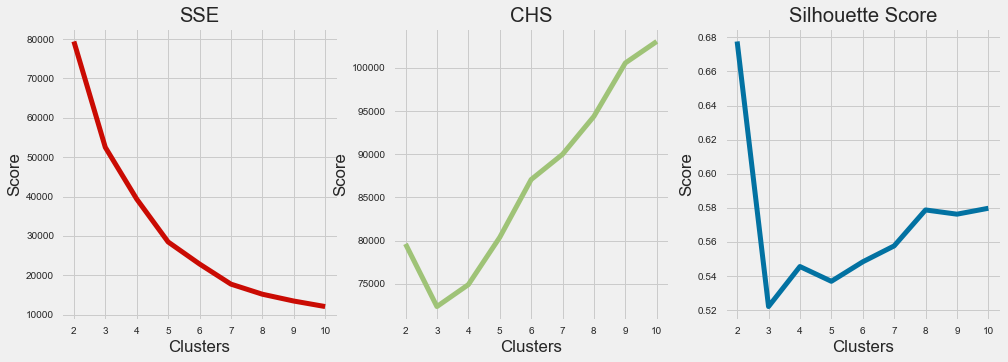

In [10]:
# Plot des scores SSE, CHS et Silhouette

plt.style.use("fivethirtyeight")
plt.subplots(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(2,11), sse, 'r', linewidth=5)
plt.title('SSE')
plt.xlabel('Clusters')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.plot(range(2,11), chs, 'g', linewidth = 5)
plt.title('CHS')
plt.xlabel('Clusters')
plt.ylabel('Score')
 
plt.subplot(1, 3, 3)
plt.plot(range(2,11), sil, 'b', linewidth = 5)
plt.title('Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()

De ces 3 méthodes, nous obtenons plusieurs suggestions pour choisir la valeur de 'k' du k-Means clustering. Nous affichons les meilleurs 3 scores de chaque méthode:

* SSE: k = 4, 5, 6 (k = 5 par Elbow Method)
* CHS: k = 6, 7, 8
* Silhouette: k = 4, 6, 7

Donc, nous estimons que k = 6 est le meilleur k pour la segmentation par k-Means.

Nous visualisons les clusters afin d'attribuer des noms aux clusters.

In [11]:
# Attribution des clusters avec k = 6

kmeans = KMeans(n_clusters = 6)
kmeans.fit(X_1)
y_kmeans = kmeans.predict(X_1)

X_1['Région'] = y_kmeans
X_1

geolocation_lat  geolocation_lng  Région
0           -23.557079       -46.767579       3
1           -22.785779       -47.312537       3
2           -12.967176       -39.243114       4
3           -28.328525       -49.049950       1
4           -27.290949       -50.577361       1
...                ...              ...     ...
73753       -20.812707       -49.415040       3
73754       -16.701907       -49.239576       5
73755       -23.000619       -43.404718       2
73756       -21.244709       -44.999202       2
73757       -19.965626       -44.138683       2

[73549 rows x 3 columns]

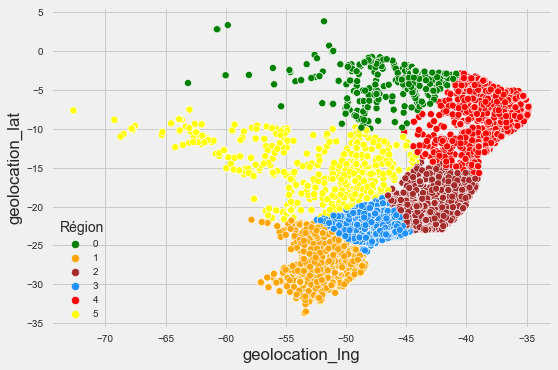

In [12]:
# Visualisation des clusters

sns.scatterplot(data = X_1, x = "geolocation_lng", y = "geolocation_lat", hue = "Région",
                palette = ['green', 'orange', 'brown', 'dodgerblue', 'red', 'yellow'], legend = 'full')
plt.show()

Avec cette visualisation, nous attribuons des noms aux clusters.

Région

0: Sud-Est

1: Sao Paulo

2: Nord

3: Nord-Est

4: Sud

5: Centre

Maintenant, nous ferons une visualisation TSNE afin de mieux comprendre les clusters.

In [13]:
X_a = X_1[['geolocation_lat', 'geolocation_lng']]
y = X_1[['Région']]

tsne = TSNE(n_components = 2)
X_hat = tsne.fit_transform(X_a)

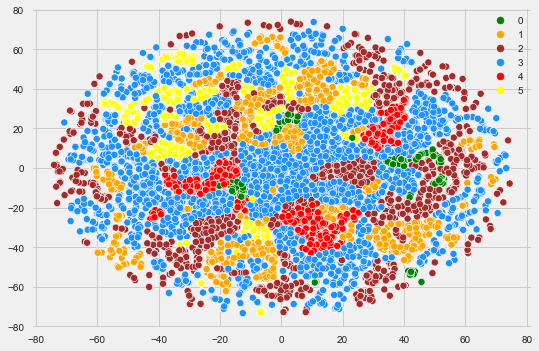

In [31]:
# To plot the embedding

y = np.array(X_1['Région'])
sns.scatterplot(data = X_hat, x = X_hat[:,0], y = X_hat[:,1], c = y, s = 50, marker ='o', hue = y,
                palette = ['green', 'orange', 'brown', 'dodgerblue', 'red', 'yellow'], legend = 'full');

<h2><center>III. Segmentation par RFM</h2></center>

Dans cette section, nous ferons deux segmentations. Une segmentation 'manuelle' et une segmentation 'automatique'. La segmentation 'manuelle' est basée sur les principes du RFM comme montré ici: https://www.next-decision.fr/wiki/segmentation-client-recence-frequentation-montant-segmentation-client-rfm.

D'abord, nous définissons la fonction de clustering manuelle.

In [32]:
# Fonction de la clustering manuelle 

def k_means_group(data, n_clusters, random_state, asc = False, log_transf = False, standard_tranf = False):
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
    kmeans_sel = KMeans(n_clusters = n_clusters, random_state = random_state).fit(data_temp)
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by = mean_group.columns[1], ascending = asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1)]
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    return cluster_group['cluster'].map(cluster_map)

Maintenant, nous définissons des valeurs de clusters (entre 1 et 3) pour chaque variable (Recénce, Fréquence, Montant).

In [33]:
#Clustering chaque critére entre 1 et 3

r_labels = k_means_group(rfm_data[['recénce']], 3, 1,asc=True)
f_labels = k_means_group(rfm_data[['fréquence']], 3, 1)
m_labels = k_means_group(rfm_data[['montant']], 3, 1)
rfm_data = rfm_data.assign(R = r_labels, F = f_labels, M = m_labels) 
rfm_data

customer_unique_id        purchase_date  recénce  \
0      0000366f3b9a7992bf8c76cfdf3221e2  2018-09-03 09:06:57      115   
1      0000b849f77a49e4a4ce2b2a4ca5be3f  2018-09-03 09:06:57      118   
2      0000f46a3911fa3c0805444483337064  2018-09-03 09:06:57      541   
3      0000f6ccb0745a6a4b88665a16c9f078  2018-09-03 09:06:57      325   
4      0004aac84e0df4da2b147fca70cf8255  2018-09-03 09:06:57      292   
...                                 ...                  ...      ...   
94984  fffcf5a5ff07b0908bd4e2dbc735a684  2018-09-03 09:06:57      451   
94985  fffea47cd6d3cc0a88bd621562a9d061  2018-09-03 09:06:57      266   
94986  ffff371b4d645b6ecea244b27531430a  2018-09-03 09:06:57      572   
94987  ffff5962728ec6157033ef9805bacc48  2018-09-03 09:06:57      123   
94988  ffffd2657e2aad2907e67c3e9daecbeb  2018-09-03 09:06:57      488   

       fréquence  montant  R  F  M  
0              1   129.90  3  1  1  
1              1    18.90  3  1  1  
2              1    69.00  1  1  1  
3              1    25.99  2  1  1  
4              1   180.00  2  1  1  
...          ...      ... .. .. ..  
94984          1  1570.00  1  1  3  
94985          1    64.89  2  1  1  
94986          1    89.90  1  1  1  
94987          1   115.00  3  1  1  
94988          1    56.99  1  1  1  

[94989 rows x 8 columns]

Nous attribuons les clients aux 9 clusters définis par notre équipe.

In [34]:
# Définition des noms des clusters

def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    if (data['R'] == 1 and data['F'] == 1 and data['M'] == 1):
        return 'Clients perdus depuis longtemps'
    if (data['R'] == 1 and data['F'] >= 2 and data['M'] == 1):
        return 'Clients non-confirmés'
    if (data['R'] == 1 and data['F'] > 1 and data['M'] >= 2):
        return 'Clients réguliers perdus récemment'
    if (data['R'] == 2 and data['F'] <= 2 and data['M'] <= 2):
        return 'Clients récents à petits CA'
    if (data['R'] == 2 and data['F'] | data['M'] == 3):
        return 'Clients récents à forts CA'
    if (data['R'] == 3 and data['F'] == 1):
        return 'clients réguliers en décroissance'
    if (data['R'] == 3 and data['F'] >= 2 and data['M'] == 1):
        return 'Clients réguliers à petit CA'
    if (data['R'] == 3 and data['F'] >= 2 and data['M'] == 2):
        return 'Clients réguliers en développement'
    if (data['R'] == 3 and data['F'] >= 2 and data['M'] == 3):
        return 'Très bons clients réguliers'
rfm_data['segment'] = rfm_data.apply(get_segment,axis=1)

Nous visualisons le pourcentage des clients aux 9 clusters. Les noms de clusters indiquent l'action à effectuer par l'équipe de Marketing.

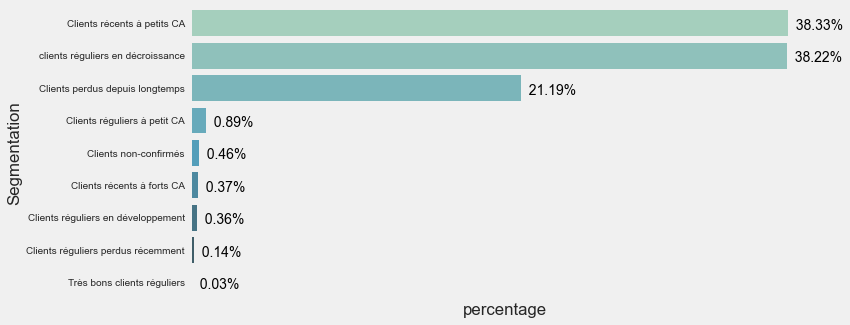

In [35]:
# Pourcentage des clients par cluster

plt.figure(figsize=(10,5))
percentage = (rfm_data['segment'].value_counts(normalize=True)* 100).reset_index(name = 'percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="GnBu_d")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v) + "%", color = 'black', ha = "left")
g.set_ylabel('Segmentation')
g.set(xticks = [])
plt.show()

Maintenant, nous effectuerons la clustering automatique.

In [36]:
# Préparation du Cluster Set

X_2 = rfm_data.iloc[:,2:5]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_2)

Calcul du SSE, CHS et Silhouette Score afin de trouver le meilleur 'k'.

In [37]:
# Calcul du SSE, CHS et Silhoeutte Score

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 100, "random_state": 10}

# A list holds the SSE values for each k
sse = []
chs = []
sil = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    kmeans = KMeans(init = 'k-means++', algorithm = 'auto', n_clusters = k, max_iter = 100, random_state = 1,
                    verbose = 0).fit(X_2)
    clustery = kmeans.predict(X_2)
    chs.append(metrics.calinski_harabasz_score(X_2, clustery))
    labels = cluster.KMeans(n_clusters = k, init = "k-means++", random_state = 200).fit(X_2).labels_
    sil.append(metrics.silhouette_score(X_2, labels, metric = "euclidean", sample_size = 1000, random_state = 200))

kl = KneeLocator(range(2, 11), sse, curve = "convex", direction = "decreasing")
print('Elbow Method gives a k of:', kl.elbow)

Elbow Method gives a k of: 4


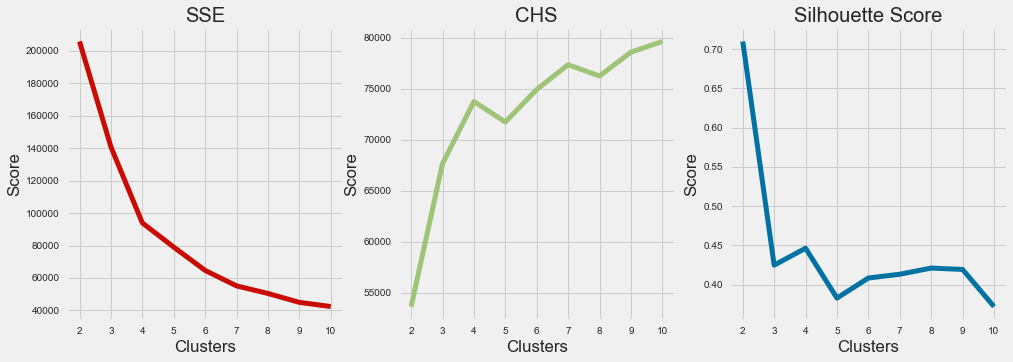

In [38]:
# Plot des scores SSE, CHS et Silhouette

plt.style.use("fivethirtyeight")
plt.subplots(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(2,11), sse, 'r', linewidth=5)
plt.title('SSE')
plt.xlabel('Clusters')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.plot(range(2,11), chs, 'g', linewidth = 5)
plt.title('CHS')
plt.xlabel('Clusters')
plt.ylabel('Score')
 
plt.subplot(1, 3, 3)
plt.plot(range(2,11), sil, 'b', linewidth = 5)
plt.title('Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()

De ces 3 méthodes, nous obtenons plusieurs suggestions pour choisir la valeur de 'k' du k-Means clustering. Nous affichons les meilleurs 3 scores de chaque méthode:

* SSE: k = 4, 5, 6 (k = 4 par Elbow Method)
* CHS: k = 4, 7, 9
* Silhouette: k = 4, 6, 9

Donc, nous estimons que k = 4 est le meilleur k pour la segmentation par k-Means.

In [39]:
# Attribution des clusters avec k = 4

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_2)
y_kmeans = kmeans.predict(X_2)

X_2['Clusters'] = y_kmeans
X_2

recénce  fréquence  montant  Clusters
0          115          1   129.90         0
1          118          1    18.90         0
2          541          1    69.00         1
3          325          1    25.99         1
4          292          1   180.00         1
...        ...        ...      ...       ...
94984      451          1  1570.00         2
94985      266          1    64.89         1
94986      572          1    89.90         1
94987      123          1   115.00         0
94988      488          1    56.99         1

[94989 rows x 4 columns]

In [40]:
PLOT = go.Figure()
for C in list(X_2.Clusters.unique()):  
    PLOT.add_trace(go.Scatter3d(y = X_2[X_2.Clusters == C]['recénce'],
                                z = X_2[X_2.Clusters == C]['fréquence'],
                                x = X_2[X_2.Clusters == C]['montant'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))

In [41]:
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis = dict(title = 'Montant', titlefont_color = 'black'),
                                yaxis = dict(title = 'Recénce', titlefont_color = 'black'),
                                zaxis = dict(title = 'Fréquence', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

Maintenant, nous nommons les clusters ainsi:

* Clusters 3 : Clients perdus

* Clusters 1: Clients reguliérs à petits CA

* Clusters 0 : Clients en développement

* Clusters 2 : Bons Clients 

Nous ferons une visualisation TSNE de ces clusters.

In [42]:
X_b = X_2[['recénce', 'fréquence', 'montant']]
y = X_2[['Clusters']]

tsne = TSNE(n_components = 3)
X_hat_2 = tsne.fit_transform(X_b)

<ipython-input-61-b06065232f44>:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



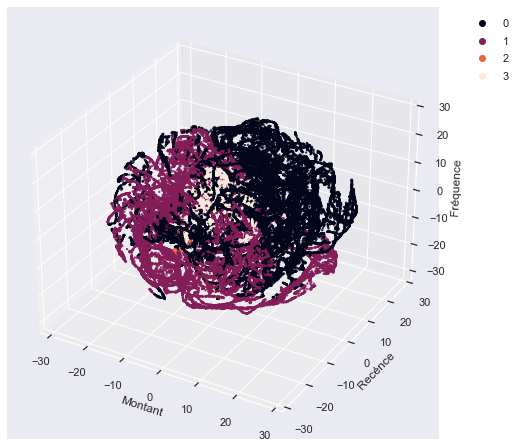

In [61]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)
x = X_hat_2[:,0]
y = X_hat_2[:,1]
z = X_hat_2[:,2]
y_2 = np.array(X_2['Clusters'])
sc = ax.scatter(x, y, z, s=2, c= y_2, marker='o')
ax.set_xlabel('Montant')
ax.set_ylabel('Recénce')
ax.set_zlabel('Fréquence')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2);

Parmi les différentes segmentations des clients, le RFM segmentation est la plus intéressante. Nous évaluerons la fréquence de maintenance requise pour ce modèle dans le notebook: Projet 5_Maintenance.